Iteration 1, Best path length: 294.49825540883353
Iteration 2, Best path length: 294.49825540883353
Iteration 3, Best path length: 294.49825540883353
Iteration 4, Best path length: 294.49825540883353
Iteration 5, Best path length: 294.49825540883353
Iteration 6, Best path length: 294.49825540883353
Iteration 7, Best path length: 294.49825540883353
Iteration 8, Best path length: 294.49825540883353
Iteration 9, Best path length: 294.49825540883353
Iteration 10, Best path length: 294.49825540883353
Iteration 11, Best path length: 294.49825540883353
Iteration 12, Best path length: 294.49825540883353
Iteration 13, Best path length: 294.49825540883353
Iteration 14, Best path length: 294.49825540883353
Iteration 15, Best path length: 294.49825540883353
Iteration 16, Best path length: 294.49825540883353
Iteration 17, Best path length: 294.49825540883353
Iteration 18, Best path length: 294.49825540883353
Iteration 19, Best path length: 294.49825540883353
Iteration 20, Best path length: 294.4982

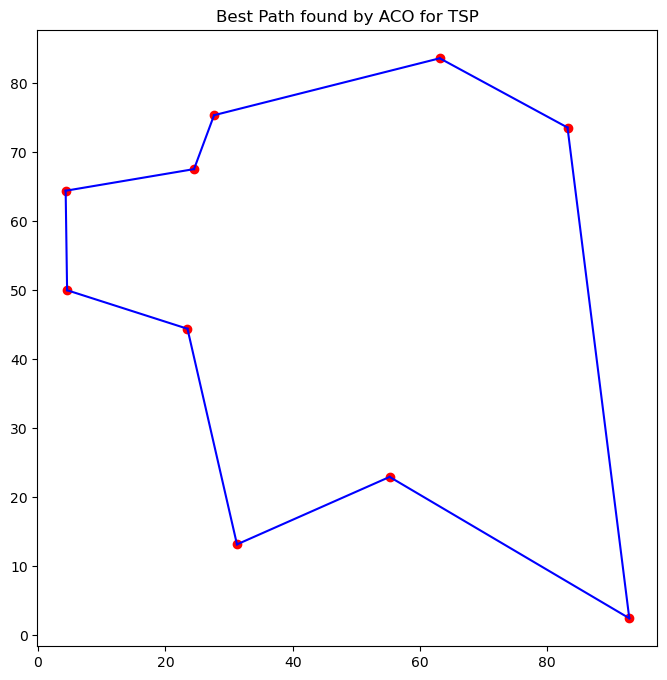

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Clase para resolver el problema del Viajante utilizando ACO
class AntColonyOptimizationTSP:
    def __init__(self, distances, num_ants, num_iterations, evaporation_rate, alpha=1, beta=5):
        self.distances = distances  # Matriz de distancias entre las ciudades
        self.num_cities = distances.shape[0]  # Número de ciudades
        self.num_ants = num_ants  # Número de hormigas
        self.num_iterations = num_iterations  # Número de iteraciones
        self.evaporation_rate = evaporation_rate  # Tasa de evaporación de feromonas
        self.alpha = alpha  # Controla la influencia de las feromonas
        self.beta = beta  # Controla la influencia de la heurística (distancia)
        self.pheromones = np.ones((self.num_cities, self.num_cities))  # Inicializar las feromonas
        self.best_path = None  # Guardará el mejor camino encontrado
        self.best_path_length = np.inf  # Longitud del mejor camino encontrado

    def _initialize_ants(self):
        ants = []
        for _ in range(self.num_ants):
            ant = np.random.permutation(self.num_cities)  # Hormiga que genera un recorrido aleatorio
            ants.append(ant)
        return ants

    def _calculate_probability(self, current_city, visited):
        probabilities = []
        pheromones = np.copy(self.pheromones[current_city])
        distances = np.copy(self.distances[current_city])

        # Convierte visited en una lista para evitar problemas de indexación
        visited = list(visited)
        
        # Penaliza las ciudades ya visitadas asignando probabilidad 0
        pheromones[visited] = 0
        distances[visited] = np.inf

        # Calcula la probabilidad según la fórmula del ACO
        attractiveness = (pheromones ** self.alpha) * ((1 / distances) ** self.beta)
        total_attractiveness = np.sum(attractiveness)

        if total_attractiveness == 0:
            return np.ones(self.num_cities) / self.num_cities  # Probabilidad uniforme si no hay opciones

        probabilities = attractiveness / total_attractiveness
        return probabilities

    def _select_next_city(self, current_city, visited):
        probabilities = self._calculate_probability(current_city, visited)
        next_city = np.random.choice(np.arange(self.num_cities), p=probabilities)
        return next_city

    def _path_length(self, path):
        length = 0
        for i in range(len(path) - 1):
            length += self.distances[path[i], path[i + 1]]
        length += self.distances[path[-1], path[0]]  # Vuelve al inicio
        return length

    def _update_pheromones(self, all_paths):
        # Evaporación de feromonas
        self.pheromones *= (1 - self.evaporation_rate)

        for path, length in all_paths:
            for i in range(len(path) - 1):
                self.pheromones[path[i], path[i + 1]] += 1 / length
                self.pheromones[path[i + 1], path[i]] += 1 / length

    def find_best_path(self):
        for iteration in range(self.num_iterations):
            all_paths = []
            for _ in range(self.num_ants):
                visited = set()
                current_city = np.random.randint(0, self.num_cities)
                path = [current_city]
                visited.add(current_city)

                # Construye el camino completo de la hormiga
                while len(visited) < self.num_cities:
                    next_city = self._select_next_city(current_city, visited)
                    path.append(next_city)
                    visited.add(next_city)
                    current_city = next_city

                path_length = self._path_length(path)
                all_paths.append((path, path_length))

                # Actualiza el mejor camino encontrado
                if path_length < self.best_path_length:
                    self.best_path = path
                    self.best_path_length = path_length

            self._update_pheromones(all_paths)
            print(f"Iteration {iteration + 1}, Best path length: {self.best_path_length}")

        return self.best_path, self.best_path_length

    def plot(self, city_coordinates):
        path = self.best_path + [self.best_path[0]]  # Regresar al punto de partida
        plt.figure(figsize=(8, 8))
        for i in range(len(path) - 1):
            plt.plot([city_coordinates[path[i]][0], city_coordinates[path[i + 1]][0]],
                     [city_coordinates[path[i]][1], city_coordinates[path[i + 1]][1]], 'b')
        plt.scatter(city_coordinates[:, 0], city_coordinates[:, 1], color='red', marker='o')
        plt.title('Best Path found by ACO for TSP')
        plt.show()


# Generar un conjunto de ciudades aleatorias
num_cities = 10
city_coordinates = np.random.rand(num_cities, 2) * 100

# Calcular la matriz de distancias entre ciudades
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(i + 1, num_cities):
        distances[i, j] = distances[j, i] = np.linalg.norm(city_coordinates[i] - city_coordinates[j])

# Parámetros del ACO
num_ants = 20
num_iterations = 100
evaporation_rate = 0.5
alpha = 1  # Influencia de las feromonas
beta = 7  # Influencia de la heurística (distancia)

# Inicializar y ejecutar ACO para el TSP
aco = AntColonyOptimizationTSP(distances, num_ants, num_iterations, evaporation_rate, alpha, beta)
best_path, best_length = aco.find_best_path()

# Mostrar resultados
print("Best path found: ", best_path)
print("Best path length: ", best_length)

# Graficar el mejor camino encontrado
aco.plot(city_coordinates)
